# Deep Learning Wine Quality Predictor

This notebook shows how to build a deep learning model to predict the quality score of different wines

In [1]:
# Initial imports
from path import Path
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

%matplotlib inline

In [2]:
# Read in data
data = Path("./Resources/winequality.csv")
df = pd.read_csv(data, delimiter=";")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
# Create the features (X) and target (y) sets
X = df.iloc[:, 0:11].values
y = df["quality"].values

In [5]:
# Scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X = scaler.transform(X)

In [6]:
X

array([[-0.52835961,  0.96187667, -1.39147228, ...,  1.28864292,
        -0.57920652, -0.96024611],
       [-0.29854743,  1.96744245, -1.39147228, ..., -0.7199333 ,
         0.1289504 , -0.58477711],
       [-0.29854743,  1.29706527, -1.18607043, ..., -0.33117661,
        -0.04808883, -0.58477711],
       ...,
       [-1.1603431 , -0.09955388, -0.72391627, ...,  0.70550789,
         0.54204194,  0.54162988],
       [-1.39015528,  0.65462046, -0.77526673, ...,  1.6773996 ,
         0.30598963, -0.20930812],
       [-1.33270223, -1.21684919,  1.02199944, ...,  0.51112954,
         0.01092425,  0.54162988]])

In [7]:
# Define the model - shallow neural net
number_hidden_nodes = 8
number_input_features = 11

In [8]:
nn = Sequential()
# Hidden layer
nn.add(
    Dense(units=number_hidden_nodes, input_dim=number_input_features, activation="relu")
)
# Output layer
nn.add(Dense(units=1, activation="linear"))

In [9]:
# Compile the model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

In [10]:
# Train the model
model_1 = nn.fit(X, y, validation_split=0.3, epochs=200)

Epoch 1/200
35/35 [==============================] - 1s 24ms/step - loss: 33.1338 - mse: 33.1338 - val_loss: 31.9772 - val_mse: 31.9772
Epoch 2/200
35/35 [==============================] - 0s 2ms/step - loss: 29.5489 - mse: 29.5489 - val_loss: 29.1187 - val_mse: 29.1187
Epoch 3/200
35/35 [==============================] - 0s 2ms/step - loss: 26.0011 - mse: 26.0011 - val_loss: 26.5591 - val_mse: 26.5591
Epoch 4/200
35/35 [==============================] - 0s 2ms/step - loss: 22.5737 - mse: 22.5737 - val_loss: 24.2285 - val_mse: 24.2285
Epoch 5/200
35/35 [==============================] - 0s 2ms/step - loss: 19.8631 - mse: 19.8631 - val_loss: 22.0521 - val_mse: 22.0521
Epoch 6/200
35/35 [==============================] - 0s 2ms/step - loss: 17.6647 - mse: 17.6647 - val_loss: 19.9854 - val_mse: 19.9854
Epoch 7/200
35/35 [==============================] - 0s 2ms/step - loss: 15.3112 - mse: 15.3112 - val_loss: 18.0438 - val_mse: 18.0438
Epoch 8/200
35/35 [==============================] - 0

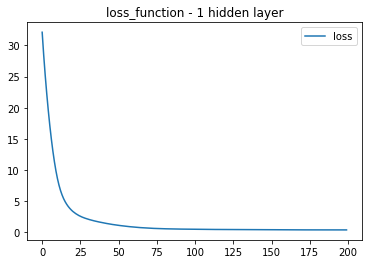

In [11]:
# Plot the train and test loss function
plt.plot(model_1.history["loss"])
plt.title("loss_function - 1 hidden layer")
plt.legend(["loss"])
plt.show()

In [12]:
# Define the model - deep neural net
number_input_features = 11
hidden_nodes_layer1 = 8
hidden_nodes_layer2 = 4

nn = Sequential()
# First hidden layer
nn.add(
    Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)
# Second hidden layer
nn.add(Dense(units=hidden_nodes_layer2, activation="relu"))
# Output layer
nn.add(Dense(units=1, activation="linear"))

In [13]:
# Compile model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

# Fit the model
model_2 = nn.fit(X, y, validation_split=0.3, epochs=200)

Epoch 1/200
35/35 [==============================] - 1s 6ms/step - loss: 24.4271 - mse: 24.4271 - val_loss: 16.8179 - val_mse: 16.8179
Epoch 2/200
35/35 [==============================] - 0s 2ms/step - loss: 20.9615 - mse: 20.9615 - val_loss: 13.1454 - val_mse: 13.1454
Epoch 3/200
35/35 [==============================] - 0s 2ms/step - loss: 18.0967 - mse: 18.0967 - val_loss: 10.2299 - val_mse: 10.2299
Epoch 4/200
35/35 [==============================] - 0s 2ms/step - loss: 14.0860 - mse: 14.0860 - val_loss: 8.0160 - val_mse: 8.0160
Epoch 5/200
35/35 [==============================] - 0s 2ms/step - loss: 11.1703 - mse: 11.1703 - val_loss: 6.2987 - val_mse: 6.2987
Epoch 6/200
35/35 [==============================] - 0s 2ms/step - loss: 9.2409 - mse: 9.2409 - val_loss: 4.9806 - val_mse: 4.9806
Epoch 7/200
35/35 [==============================] - 0s 2ms/step - loss: 5.9844 - mse: 5.9844 - val_loss: 4.0283 - val_mse: 4.0283
Epoch 8/200
35/35 [==============================] - 0s 2ms/step - 

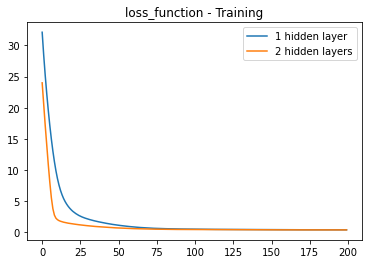

In [14]:
plt.plot(model_1.history["loss"])
plt.plot(model_2.history["loss"])
plt.title("loss_function - Training")
plt.legend(["1 hidden layer", "2 hidden layers"])
plt.show()

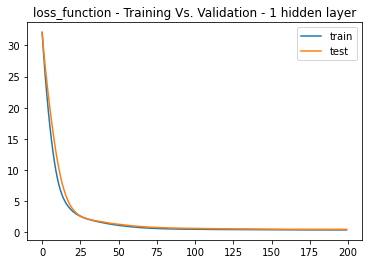

In [15]:
# Train vs test for shallow net
plt.plot(model_1.history["loss"])
plt.plot(model_1.history["val_loss"])
plt.title("loss_function - Training Vs. Validation - 1 hidden layer")
plt.legend(["train", "test"])
plt.show()

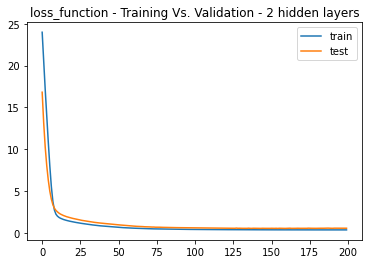

In [16]:
# Train vs test for deep net
plt.plot(model_2.history["loss"])
plt.plot(model_2.history["val_loss"])
plt.title("loss_function - Training Vs. Validation - 2 hidden layers")
plt.legend(["train", "test"])
plt.show()